In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


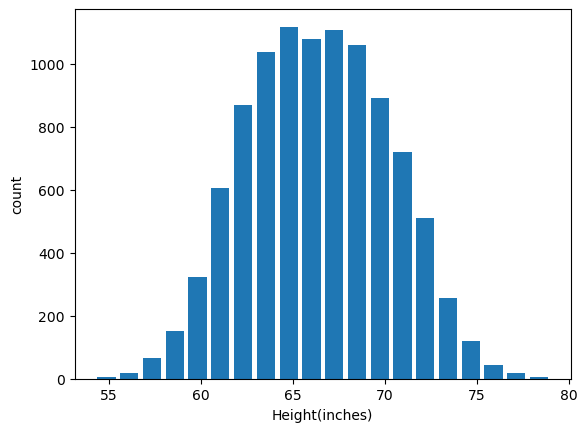

In [4]:
plt.hist(df["Height"],bins=20, rwidth=0.8)
plt.xlabel("Height(inches)")
plt.ylabel("count")
plt.show()

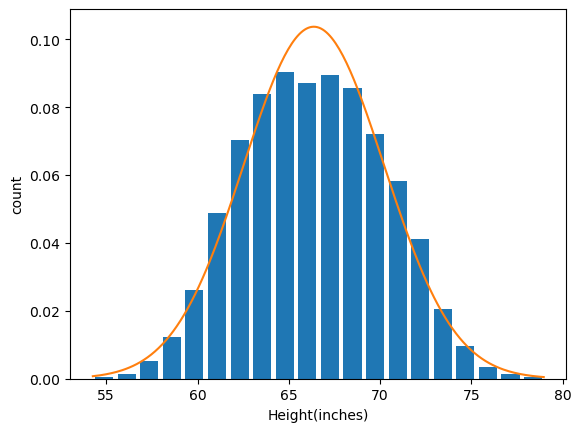

In [5]:
from scipy.stats import norm 
import numpy as np 

plt.hist(df["Height"],bins=20, rwidth=0.8, density=True)
plt.xlabel("Height(inches)")
plt.ylabel("count")

rng=np.arange(df.Height.min(),df.Height.max(), 0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

# Removing Outlier using stand deviation df.std()

In [11]:
upper_limit=df.Height.mean()+3*df.Height.std()
lower_limit=df.Height.mean()-3*df.Height.std()

In [13]:
df[(df["Height"]>upper_limit)  | (df["Height"]<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [15]:
df_no_outlier=df[(df["Height"]<upper_limit) & (df["Height"]>lower_limit)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
df.shape

(10000, 3)

In [18]:
df_no_outlier.shape

(9993, 3)

# Calculating  Z score and using it for removing outlier


In [32]:
df["Zscore"]=(df["Height"] - df["Height"].mean()) / df["Height"].std()

In [33]:
df


,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [34]:
df[(df["Zscore"]>3) | (df["Zscore"]<-3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [37]:
df_no_outlier=df[(df["Zscore"]>-3) & (df["Zscore"]<3)]

In [38]:
df_no_outlier.head()

,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
